In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def generating(N):
    x = np.random.uniform(-1,1,N)
    y = np.sign(x)
    
    #add noise
    flip = np.random.rand(N) <= 0.1
    y[flip] = -y[flip]
    
    return x, y 


def alg(x, y, N):
    #sort x
    x_sorted = np.sort(x)
    
    # construct theta
    theta = [-1]
    for i in range(N - 1):
        if x_sorted[i] != x_sorted[i+1]:
            theta_temp = (x_sorted[i] + x_sorted[i+1]) / 2
            theta.append(theta_temp)
            
    # set variable
    Ein_best = float('inf')
    theta_best = None
    s_best = None

    # calculate Ein
    for s in [-1, 1]:
        for theta_i in theta:
            h = s * np.sign( x - theta_i )
            error = np.sum(h != y)/N
            
            if error < Ein_best:
                Ein_best = error
                theta_best = theta_i
                s_best = s 
            
    return Ein_best, theta_best, s_best


def Eout_alg(s, theta):
    Eout = 0.5 - 0.4 * s + 0.4 * s * np.abs(theta)
    
    return Eout


def plot(Eins, Eouts):
    plt.scatter(Eins, Eouts, alpha=0.6)
    plt.xlabel(f'E_in(g)')
    plt.ylabel(f'E_out(g)')
    plt.show()

median of Eout(g) - Ein(g)  = 0.038840419142252225


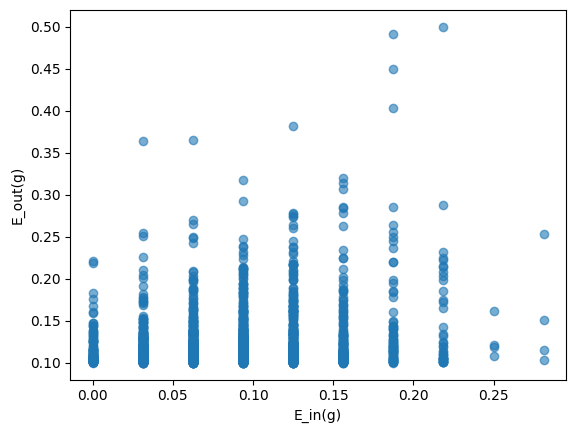

In [40]:
Eins = []
thetas = []
ss = []
Eouts = []

for i in range(2000):
    np.random.seed(i)
    x,y = generating(32)
    Ein_best, theta_best, s_best = alg(x,y,32)
    Eout = Eout_alg(s_best, theta_best)
    
    ### save data
    Eins.append(Ein_best)
    thetas.append(theta_best)
    ss.append(s_best)
    Eouts.append(Eout)

differences = np.median(np.array(Eouts) - np.array(Eins))
print(f'median of Eout(g) - Ein(g)  = {differences}')
plot(Eins, Eouts)

median of Eout(g) - Ein(g)  = 0.12272303269422319


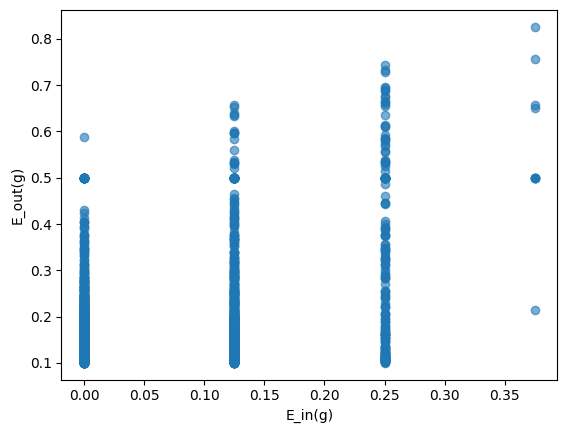

In [41]:
Eins = []
thetas = []
ss = []
Eouts = []

for i in range(2000):
    np.random.seed(i)
    x,y = generating(8)
    Ein_best, theta_best, s_best = alg(x,y,8)
    Eout = Eout_alg(s_best, theta_best)
    
    ### save data
    Eins.append(Ein_best)
    thetas.append(theta_best)
    ss.append(s_best)
    Eouts.append(Eout)

differences = np.median(np.array(Eouts) - np.array(Eins))
print(f'median of Eout(g) - Ein(g)  = {differences}')
plot(Eins, Eouts)

In [42]:
def random_alg(x, y, N):    
    # construct theta
    theta = np.random.uniform(-1,1)
    s = np.random.choice([1,-1])
    
    h = s * np.sign( x - theta )
    error = np.sum(h != y)/N
    
    return error, theta, s

median of Eout(g) - Ein(g)  = -0.005876857881128586


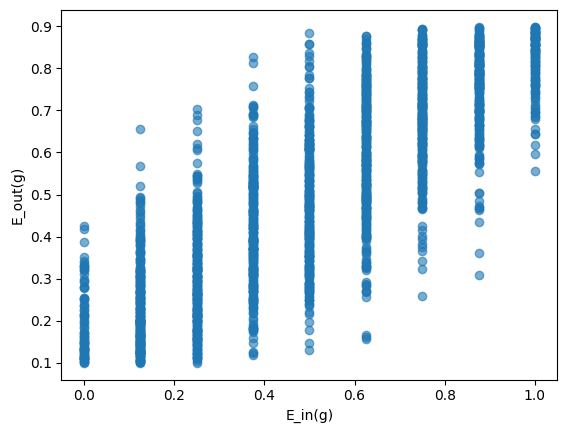

In [43]:
Eins = []
thetas = []
ss = []
Eouts = []

for i in range(2000):
    np.random.seed(i)
    x,y = generating(8)
    Ein_best, theta_best, s_best = random_alg(x,y,8)
    Eout = Eout_alg(s_best, theta_best)
    
    ### save data
    Eins.append(Ein_best)
    thetas.append(theta_best)
    ss.append(s_best)
    Eouts.append(Eout)

differences = np.median(np.array(Eouts) - np.array(Eins))
print(f'median of Eout(g) - Ein(g)  = {differences}')
plot(Eins, Eouts)